In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:

df = pd.read_csv("data.csv")
df.head(3)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3        1.5         1340      7912     1.5           0     0   
1         5        2.5         3650      9050     2.0           0     4   
2         3        2.0         1930     11947     1.0           0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated       city  \
0          3        1340              0      1955          2005  Shoreline   
1          5        3370            280      1921             0    Seattle   
2          4        1930              0      1966             0       Kent   

       price  
0   313000.0  
1  2384000.0  
2   342000.0

In [3]:
df.columns


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'price'],
      dtype='object')

In [4]:
df.drop(['city'], axis=1, inplace=True)  # axis=0 → row


In [5]:
df.head(3)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3        1.5         1340      7912     1.5           0     0   
1         5        2.5         3650      9050     2.0           0     4   
2         3        2.0         1930     11947     1.0           0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated      price  
0          3        1340              0      1955          2005   313000.0  
1          5        3370            280      1921             0  2384000.0  
2          4        1930              0      1966             0   342000.0

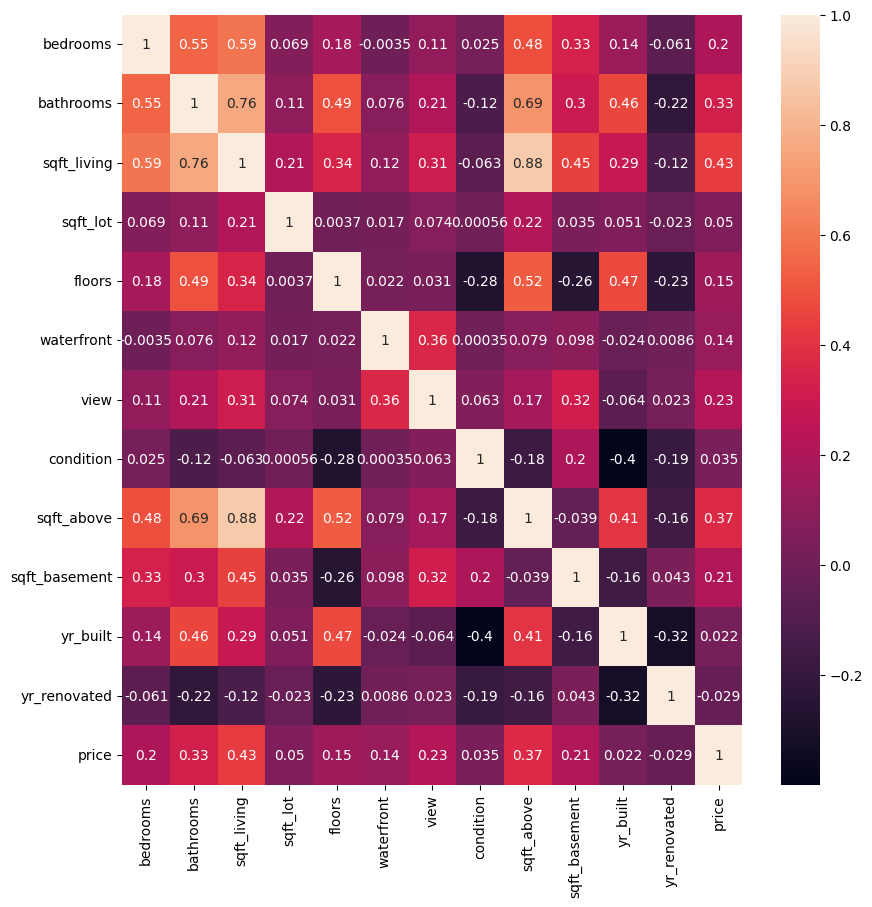

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

In [7]:
x=df.iloc[:,:-1]
x

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0            3       1.50         1340      7912     1.5           0     0   
1            5       2.50         3650      9050     2.0           0     4   
2            3       2.00         1930     11947     1.0           0     0   
3            3       2.25         2000      8030     1.0           0     0   
4            4       2.50         1940     10500     1.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4595         3       1.75         1510      6360     1.0           0     0   
4596         3       2.50         1460      7573     2.0           0     0   
4597         3       2.50         3010      7014     2.0           0     0   
4598         4       2.00         2090      6630     1.0           0     0   
4599         3       2.50         1490      8102     2.0           0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renovated  
0             3        1340              0      1955          2005  
1             5        3370            280      1921             0  
2             4        1930              0      1966             0  
3             4        1000           1000      1963             0  
4             4        1140            800      1976          1992  
...         ...         ...            ...       ...           ...  
4595          4        1510              0      1954          1979  
4596          3        1460              0      1983          2009  
4597          3        3010              0      2009             0  
4598          3        1070           1020      1974             0  
4599          4        1490              0      1990             0  

[4600 rows x 12 columns]

In [8]:
y=df['price']

In [9]:
sc=StandardScaler()
sc.fit_transform(x)

array([[-0.44112227, -0.84320364, -0.82997105, ..., -0.67246372,
        -0.53101376,  1.22167046],
       [ 1.75970468,  0.43280154,  1.56852826, ..., -0.06912828,
        -1.67469295, -0.82569345],
       [-0.44112227, -0.20520105, -0.21736733, ..., -0.67246372,
        -0.1609999 , -0.82569345],
       ...,
       [-0.44112227,  0.43280154,  0.90400897, ..., -0.67246372,
         1.2854179 , -0.82569345],
       [ 0.6592912 , -0.20520105, -0.05123751, ...,  1.5254011 ,
         0.10810108, -0.82569345],
       [-0.44112227,  0.43280154, -0.67422434, ..., -0.67246372,
         0.64630305, -0.82569345]])

In [10]:
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y , test_size=0.2, random_state=42)

## LinearRegression

In [12]:
lr=LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [13]:
lr.score(x_test,y_test)*100

3.228385663270661

In [14]:
mse= mean_squared_error(y_test, lr.predict(x_test))
print(mse)
mbe=mean_absolute_error(y_test, lr.predict(x_test))
print(mbe)
rme=np.sqrt(mse)
print(rme)

986921767056.1217
210908.173249839
993439.3625461605


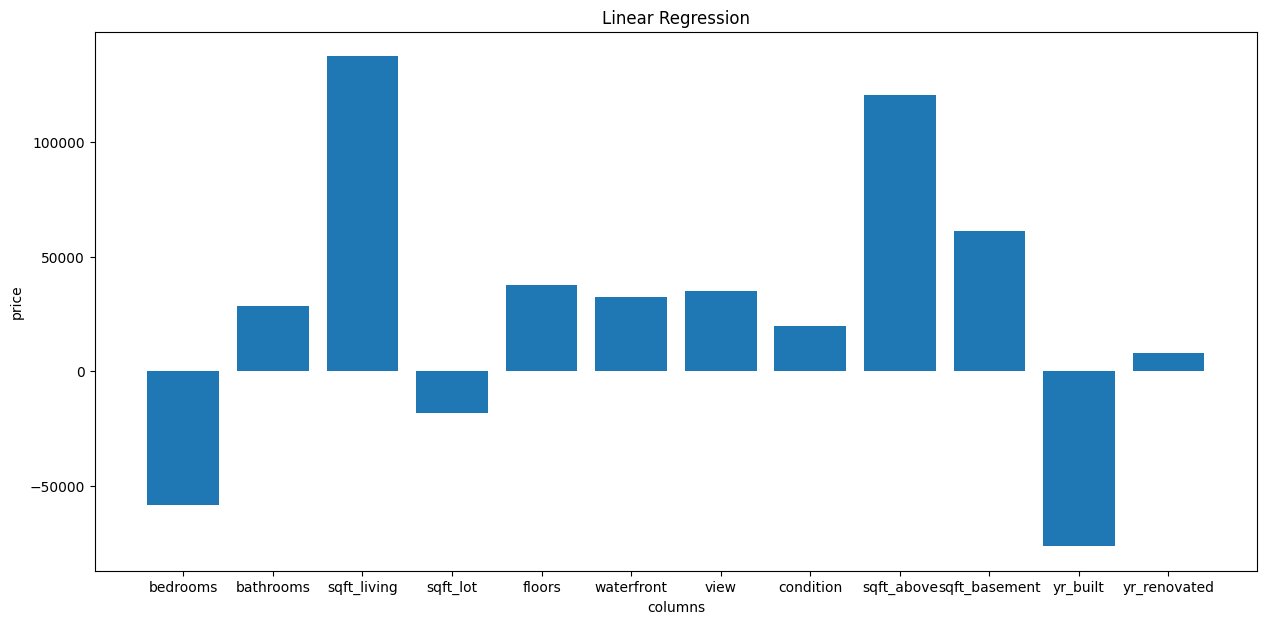

In [15]:
plt.figure(figsize=(15,7))
plt.title('Linear Regression')
plt.xlabel('columns')
plt.ylabel('price')
plt.bar(x.columns , lr.coef_ )
plt.show()


In [16]:
lr.coef_

array([-58612.02450809,  28620.91876252, 137630.25418389, -18457.45554189,
        37581.76040751,  32277.52943856,  34834.37139825,  19864.74096006,
       120697.08870061,  61415.30012411, -76377.67737856,   8089.00372624])

## Lasso Regularization L1
used for fearture selection

In [17]:
la=Lasso(alpha=0.01)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

C:\Users\smc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+13, tolerance: 5.229e+10
  model = cd_fast.enet_coordinate_descent(


3.228385177605708

In [18]:
mse= mean_squared_error(y_test, la.predict(x_test))
print(mse)
mbe=mean_absolute_error(y_test, la.predict(x_test))
print(mbe)
rme=np.sqrt(mse)
print(rme)

986921772009.158
210908.17447564355
993439.3650390335


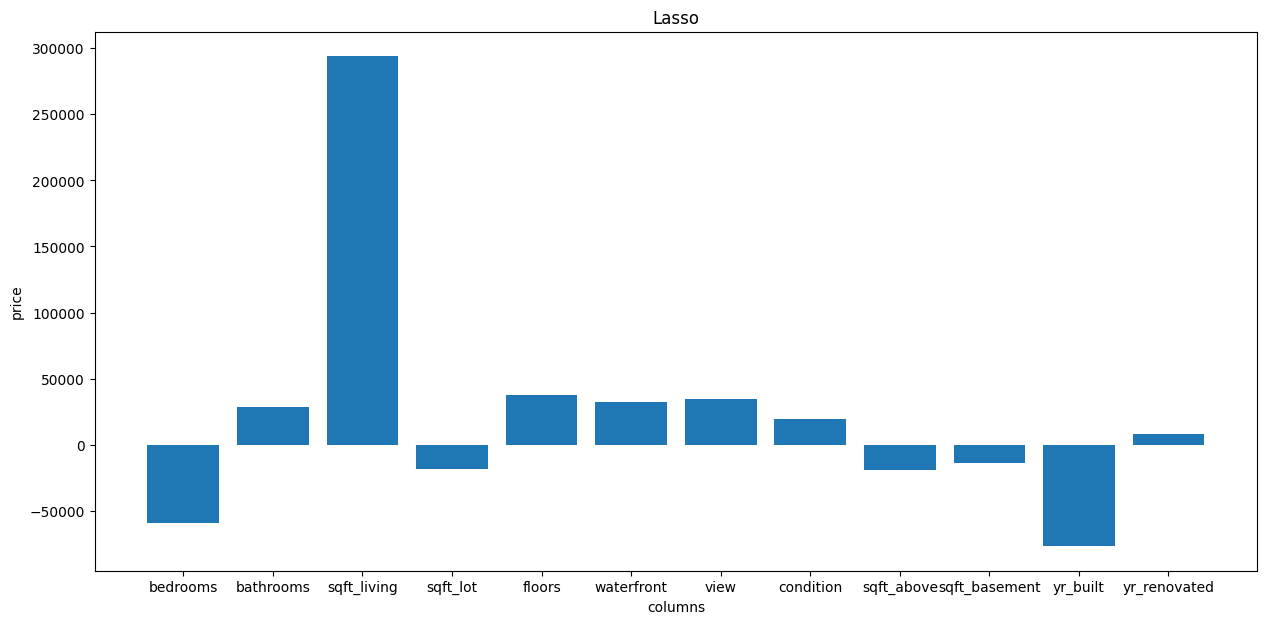

In [19]:
plt.figure(figsize=(15,7))
plt.title('Lasso')
plt.xlabel('columns')
plt.ylabel('price')
plt.bar(x.columns , la.coef_ )
plt.show()

## Ridge L2

In [20]:
ri=Ridge(alpha=10)
ri.fit(x_train, y_train)
ri.score(x_test, y_test)*100

3.24019941712842

In [21]:
mse= mean_squared_error(y_test, ri.predict(x_test))
print(mse)
mbe=mean_absolute_error(y_test, ri.predict(x_test))
print(mbe)
rme=np.sqrt(mse)
print(rme)

986801284919.7765
210815.9478735795
993378.7217973699


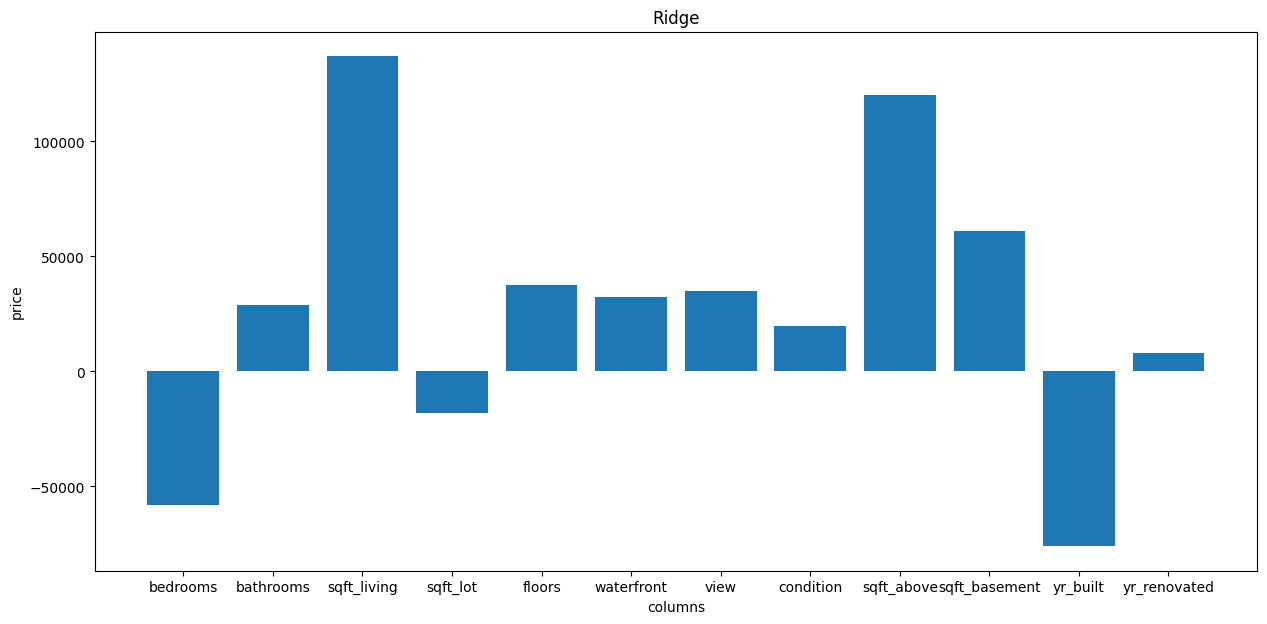

In [22]:
plt.figure(figsize=(15,7))
plt.title('Ridge')
plt.xlabel('columns')
plt.ylabel('price')
plt.bar(x.columns , ri.coef_ )
plt.show()

In [26]:
df1=pd.DataFrame({'col_name':x.columns, 'LinearRegression':lr.coef_ , 'Lasso':la.coef_ , 'Ridge':ri.coef_})
print(df1)

         col_name  LinearRegression          Lasso          Ridge
0        bedrooms     -58612.024508  -58612.012069  -58006.052994
1       bathrooms      28620.918763   28620.851520   28878.686086
2     sqft_living     137630.254184  293862.914858  137085.109644
3        sqft_lot     -18457.455542  -18457.444078  -18298.877275
4          floors      37581.760408   37581.763676   37445.130830
5      waterfront      32277.529439   32277.522911   32264.182806
6            view      34834.371398   34834.367544   34968.321859
7       condition      19864.740960   19864.724543   19870.905664
8      sqft_above     120697.088701  -19147.129423  120223.632684
9   sqft_basement      61415.300124  -13867.961864   61163.461025
10       yr_built     -76377.677379  -76377.661496  -75981.633477
11   yr_renovated       8089.003726    8088.987174    8132.118334


In [25]:
df

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0            3       1.50         1340      7912     1.5           0     0   
1            5       2.50         3650      9050     2.0           0     4   
2            3       2.00         1930     11947     1.0           0     0   
3            3       2.25         2000      8030     1.0           0     0   
4            4       2.50         1940     10500     1.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4595         3       1.75         1510      6360     1.0           0     0   
4596         3       2.50         1460      7573     2.0           0     0   
4597         3       2.50         3010      7014     2.0           0     0   
4598         4       2.00         2090      6630     1.0           0     0   
4599         3       2.50         1490      8102     2.0           0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0             3        1340              0      1955          2005   
1             5        3370            280      1921             0   
2             4        1930              0      1966             0   
3             4        1000           1000      1963             0   
4             4        1140            800      1976          1992   
...         ...         ...            ...       ...           ...   
4595          4        1510              0      1954          1979   
4596          3        1460              0      1983          2009   
4597          3        3010              0      2009             0   
4598          3        1070           1020      1974             0   
4599          4        1490              0      1990             0   

             price  
0     3.130000e+05  
1     2.384000e+06  
2     3.420000e+05  
3     4.200000e+05  
4     5.500000e+05  
...            ...  
4595  3.081667e+05  
4596  5.343333e+05  
4597  4.169042e+05  
4598  2.034000e+05  
4599  2.206000e+05  

[4600 rows x 13 columns]